In [4]:
%load_ext autoreload
%autoreload 2

### target 
- find the lowest parametered model, smallest possible model, maintaining the structure.
### results 
- train Accuracy: 98.66
- test Accuracy: 98.25
### analysis
- Model is slightly overfitting, that's because enough dropout layers are not added, train accuracy is not crossing 99%, as I have not taken in consideration the receptive field.

In [15]:
from data import get_data
from model import Model_1
from utils import train, test
import torch
import torch.optim as optim


In [2]:
train_data = get_data(train=True)
test_data = get_data(train=False)

In [3]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train_data, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test_data, **dataloader_args)

CUDA Available? True


In [16]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

model = Model_1().to(device)
summary(model, input_size=(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
       BatchNorm2d-2           [-1, 10, 26, 26]              20
              ReLU-3           [-1, 10, 26, 26]               0
            Conv2d-4           [-1, 10, 24, 24]             900
       BatchNorm2d-5           [-1, 10, 24, 24]              20
              ReLU-6           [-1, 10, 24, 24]               0
            Conv2d-7           [-1, 20, 22, 22]           1,800
       BatchNorm2d-8           [-1, 20, 22, 22]              40
              ReLU-9           [-1, 20, 22, 22]               0
          Dropout-10           [-1, 20, 22, 22]               0
        MaxPool2d-11           [-1, 20, 11, 11]               0
           Conv2d-12           [-1, 10, 11, 11]             200
      BatchNorm2d-13           [-1, 10, 11, 11]              20
             ReLU-14           [-1

In [17]:
train_losses = []
test_losses = []
train_acc = []
test_acc = []

model = Model_1().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)


EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch, train_losses, train_acc)
    test(model, device, test_loader, test_losses, test_acc)

EPOCH: 0


Loss=0.3302527368068695 Batch_id=468 Accuracy=81.73: 100%|██████████| 469/469 [00:06<00:00, 68.27it/s] 



Test set: Average loss: 0.3898, Accuracy: 9448/10000 (94.48%)

EPOCH: 1


Loss=0.1955992579460144 Batch_id=468 Accuracy=96.09: 100%|██████████| 469/469 [00:06<00:00, 68.28it/s] 



Test set: Average loss: 0.2339, Accuracy: 9542/10000 (95.42%)

EPOCH: 2


Loss=0.09981177002191544 Batch_id=468 Accuracy=97.06: 100%|██████████| 469/469 [00:06<00:00, 67.74it/s]



Test set: Average loss: 0.2041, Accuracy: 9524/10000 (95.24%)

EPOCH: 3


Loss=0.13113678991794586 Batch_id=468 Accuracy=97.49: 100%|██████████| 469/469 [00:06<00:00, 67.76it/s] 



Test set: Average loss: 0.2174, Accuracy: 9442/10000 (94.42%)

EPOCH: 4


Loss=0.07261147350072861 Batch_id=468 Accuracy=97.73: 100%|██████████| 469/469 [00:06<00:00, 67.72it/s] 



Test set: Average loss: 0.1403, Accuracy: 9667/10000 (96.67%)

EPOCH: 5


Loss=0.11861678212881088 Batch_id=468 Accuracy=97.94: 100%|██████████| 469/469 [00:06<00:00, 68.84it/s] 



Test set: Average loss: 0.1049, Accuracy: 9791/10000 (97.91%)

EPOCH: 6


Loss=0.14705277979373932 Batch_id=468 Accuracy=97.98: 100%|██████████| 469/469 [00:06<00:00, 68.75it/s] 



Test set: Average loss: 0.1152, Accuracy: 9717/10000 (97.17%)

EPOCH: 7


Loss=0.06498339772224426 Batch_id=468 Accuracy=98.12: 100%|██████████| 469/469 [00:07<00:00, 60.74it/s] 



Test set: Average loss: 0.1090, Accuracy: 9718/10000 (97.18%)

EPOCH: 8


Loss=0.08289889246225357 Batch_id=468 Accuracy=98.26: 100%|██████████| 469/469 [00:07<00:00, 64.86it/s] 



Test set: Average loss: 0.1062, Accuracy: 9731/10000 (97.31%)

EPOCH: 9


Loss=0.10475727170705795 Batch_id=468 Accuracy=98.27: 100%|██████████| 469/469 [00:07<00:00, 62.27it/s] 



Test set: Average loss: 0.0789, Accuracy: 9801/10000 (98.01%)

EPOCH: 10


Loss=0.04485002160072327 Batch_id=468 Accuracy=98.36: 100%|██████████| 469/469 [00:06<00:00, 67.13it/s] 



Test set: Average loss: 0.0930, Accuracy: 9765/10000 (97.65%)

EPOCH: 11


Loss=0.07402290403842926 Batch_id=468 Accuracy=98.42: 100%|██████████| 469/469 [00:06<00:00, 67.26it/s] 



Test set: Average loss: 0.0790, Accuracy: 9801/10000 (98.01%)

EPOCH: 12


Loss=0.11704474687576294 Batch_id=468 Accuracy=98.47: 100%|██████████| 469/469 [00:06<00:00, 69.03it/s] 



Test set: Average loss: 0.1075, Accuracy: 9679/10000 (96.79%)

EPOCH: 13


Loss=0.04123268276453018 Batch_id=468 Accuracy=98.63: 100%|██████████| 469/469 [00:06<00:00, 67.79it/s] 



Test set: Average loss: 0.0733, Accuracy: 9827/10000 (98.27%)

EPOCH: 14


Loss=0.024457881227135658 Batch_id=468 Accuracy=98.66: 100%|██████████| 469/469 [00:07<00:00, 59.26it/s]



Test set: Average loss: 0.0714, Accuracy: 9825/10000 (98.25%)



In [18]:
t = [t_items.item() for t_items in train_losses]

Text(0.5, 1.0, 'Test Accuracy')

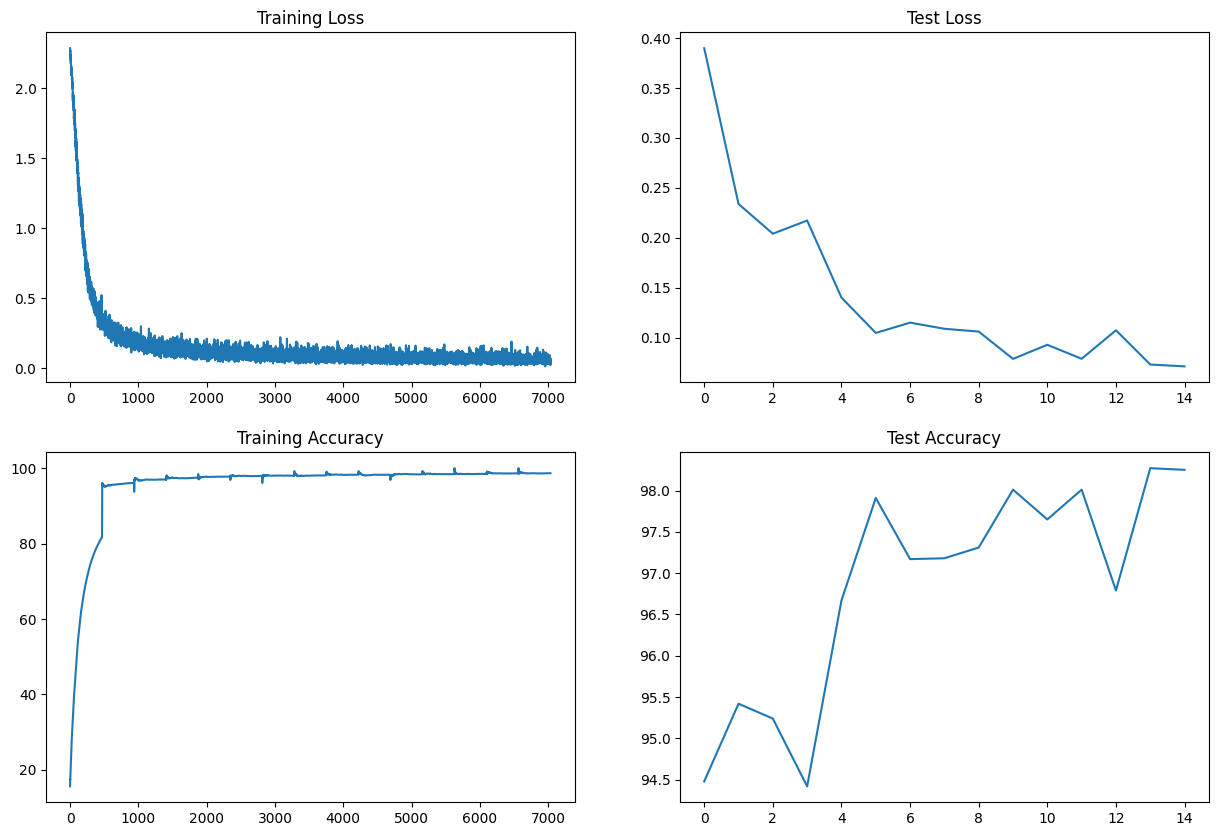

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(t)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")